# CHAPTER 6
---
# Data Loading, Storage, and File Formats

In [2]:
import pandas as pd
import numpy as np
from shapely import geometry
import sqlite3

## Reading and Writing Data in Text Format <font color='green'>[Essential]</font> <font color='green'>[Beginner]</font>

### Reading Data in Text Format <font color='green'>[Essential]</font> <font color='green'>[Beginner]</font>

In [3]:
training_folder = r'../'
data_folder = training_folder + 'data/'

In [4]:
df = pd.read_csv(data_folder + r'pandas/data.csv')

In [5]:
# attention à l'encodage des fichiers
# si l'on reçoit un message d'erreur, penser à passer l'encodage 'latin' en paramètre
accent = pd.read_csv(data_folder + r'pandas/accent.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 1: invalid continuation byte

In [6]:
accent = pd.read_csv(data_folder + r'pandas/accent.csv', encoding='latin') 

In [5]:
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [6]:
accent

,a,b,c,d,message
0,1,2,3,4,héllo
1,5,6,7,8,world
2,9,10,11,12,foo


In [7]:
pd.read_csv(data_folder + r'pandas/point_virgule.csv')

,a;b;c;d;message
0,1;2;3;4;hello
1,5;6;7;8;world
2,9;10;11;12;foo


In [8]:
pd.read_csv(data_folder + r'pandas/point_virgule.csv', sep=';')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### Writing Data Out to Text Format <font color='green'>[Essential]</font> <font color='green'>[Beginner]</font>

In [9]:
df.to_csv(data_folder + r'pandas/written_dataframe.csv')

In [10]:
df['a'].to_csv(data_folder + r'pandas/written_series.csv')

### Reading Microsoft Excel Files <font color='green'>[Essential]</font> <font color='green'>[Beginner]</font>

In [11]:
df = pd.read_excel(data_folder + r'pandas/data_excel.xlsx')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [12]:
df = pd.read_excel(data_folder + r'pandas/data_excel.xlsx', sheet_name='data')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,other_sheet_a,other_sheet_b,other_sheet_c,other_sheet_d,message
1,NaN,10,2,3,4,hello
2,NaN,577,6,7,8,world
3,NaN,889,10,11,12,foo


In [13]:
df = pd.read_excel(data_folder + r'pandas/data_excel.xlsx', sheet_name='data', usecols='B:F', header=1)
df

,other_sheet_a,other_sheet_b,other_sheet_c,other_sheet_d,message
0,10,2,3,4,hello
1,577,6,7,8,world
2,889,10,11,12,foo


In [14]:
df.to_excel(data_folder + r'pandas/written_data_excel.xlsx', sheet_name='test')

Voir également: pd.ExcelFile, pd.ExcelWriter


## Binary Data Formats <font color='#D22328'>[Advanced]</font>

### Using HDF5 Format <font color='#D22328'>[Advanced]</font>

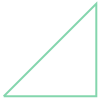

In [15]:
ring = geometry.LinearRing([(0, 0), (1, 1), (1, 0)])
ring

In [16]:
storefile = data_folder + r'pandas/store.hdf'

In [17]:
df['geometry'] = [ring] * len(df)

In [18]:
# on peut stocker des objets complexes qui ne pourraient pas être stockés en texte
df.to_hdf(storefile, 'geometry') 

C:\Users\rgoix\AppData\Local\Continuum\anaconda3\envs\quetzal_env\lib\site-packages\pandas\core\generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['message', 'geometry'], dtype='object')]

  encoding=encoding,


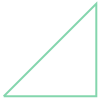

In [19]:
geo = pd.read_hdf(path_or_buf=storefile, key='geometry')
geo['geometry'].iloc[0]

### Reading Microsoft Excel Files <font color='#D22328'>[Advanced]</font>
C'est possible : voir pd.ExcelFile
Il est généralement plus simple de passer par l'étape CSV

## Interacting with Databases <font color='#D22328'>[Advanced]</font>

In [20]:
df = pd.read_csv(data_folder + r'pandas/data.csv') # lecture du CSV

In [21]:
con = sqlite3.connect(data_folder + r'pandas/database.db') # création de la base de données 

In [22]:
df.to_sql('mytable', con, if_exists='replace') # INSERT

In [23]:
pd.read_sql('SELECT * FROM mytable', con) # SELECT

,index,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo
